In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import practice_code as pc
import individual_stats as ind

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


#Reg season Stats

In [2]:
reg = pd.read_csv('CSV Files/regular_season.csv')
regular_clutch = pd.read_csv('CSV Files/clutch_time.csv')

In [3]:
ids = ind.add_ids(reg)

In [4]:
reg = pc.replace_nan(reg)

In [5]:
reg['total_blocks'] = (reg['block'] != '')*1
reg['assist_count'] = (reg['assist'] != '')*1

In [6]:
total_games = pc.get_total_games(reg)

In [7]:
player_stats_reg = ind.object_to_int(reg, 'points')

/home/ubuntu/clutch-baller/individual_stats.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  new_df = df.convert_objects(convert_numeric=True)


In [8]:
reg_assists = ind.assist_stats(player_stats_reg)
reg_blks = ind.blk_stats(player_stats_reg)
reg_names = ind.player_names(player_stats_reg)
full_reg_stats = ind.merge_all(reg_names, reg_blks, reg_assists, player_stats_reg)
full_reg_stats = ind.get_per_game_stats(full_reg_stats)
full_reg_stats = ind.merge_ids(full_reg_stats, ids)


In [9]:
reg_stats = ind.add_league_avg(full_reg_stats)

In [10]:
regular_clutch = pc.replace_nan(regular_clutch)

In [11]:
regular_clutch['total_blocks'] = (regular_clutch['block'] != '')*1

In [12]:
regular_clutch['assist_count'] = (regular_clutch['assist'] != '')*1

In [13]:
total_games = pc.get_total_games(regular_clutch)

In [14]:
total_games.head()

,player,total_games
279,Dirk Nowitzki,334
620,LeBron James,331
791,Paul Pierce,305
491,Joe Johnson,304
172,Chris Paul,298


In [15]:
player_stats_clutch = ind.object_to_int(regular_clutch, 'points')

/home/ubuntu/clutch-baller/individual_stats.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  new_df = df.convert_objects(convert_numeric=True)


In [16]:
assists = ind.assist_stats(player_stats_clutch)
blks = ind.blk_stats(player_stats_clutch)
names = ind.player_names(player_stats_clutch)

In [17]:
full_clutch_stats = ind.merge_all(names, blks, assists, player_stats_clutch)
full_clutch_stats = ind.get_per_game_stats(full_clutch_stats)

In [18]:

full_clutch_stats = ind.merge_ids(full_clutch_stats, ids)

In [24]:
clutch_stats.head()

,player,id,total_games,shots_made,shots_missed,3pt,3pt_shots,Dunk/Layup,Dunk/Layup_attempts,2pt_med/hard,med/hard_attempts,2fg_attempts,FT_made,FT_missed,assist_count,off_rebound,total_rebound,total_blocks,2pt_fg_made,total_shots,shooting%,FT%,APG,BPG,ORPG,RPG,easy_shot%,2pt%,3pt%,med/hard_fg%,league_all_shot_avg,league_2pt_avg,league_3pt_avg,league_hard2pt_avg,league_easy2pt_avg
0,A.J. Price,0.0,16,11,17,3,10,2,5,6,13,18,3,0,6,1,6,0,8,28,39.3,100.0,0.4,0.0,0.1,0.4,40.0,44.4,30.0,46.2,40.1,44.8,30.2,35.4,59.5
2,Aaron Brooks,2.0,109,58,116,17,71,22,58,19,45,103,91,20,32,8,37,2,41,174,33.3,82.0,0.3,0.0,0.1,0.3,37.9,39.8,23.9,42.2,40.1,44.8,30.2,35.4,59.5
3,Aaron Gordon,3.0,25,8,14,3,9,3,8,2,5,13,11,1,3,9,35,4,5,22,36.4,91.7,0.1,0.2,0.4,1.4,37.5,38.5,33.3,40.0,40.1,44.8,30.2,35.4,59.5
4,Aaron Gray,4.0,14,4,2,0,0,3,3,1,3,6,6,5,2,8,18,0,4,6,66.7,54.5,0.1,0.0,0.6,1.3,100.0,66.7,0.0,33.3,40.1,44.8,30.2,35.4,59.5
6,Aaron McKie,6.0,7,0,3,0,1,0,0,0,2,2,0,0,0,5,6,0,0,3,0.0,0.0,0.0,0.0,0.7,0.9,0.0,0.0,0.0,0.0,40.1,44.8,30.2,35.4,59.5


In [20]:
clutch_stats = ind.add_league_avg(full_clutch_stats)
y = ind.is_clutch(clutch_stats)

/home/ubuntu/clutch-baller/individual_stats.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['clutch_all_shots'] = (df['shooting%'] > df['league_all_shot_avg']) & (df['total_shots']>50)
/home/ubuntu/clutch-baller/individual_stats.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['clutch_2pt'] = (df['2pt%'] > df['league_2pt_avg']) & (df['2fg_attempts']>35)
/home/ubuntu/clutch-baller/individual_stats.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [23]:
z = clutch_stats[(clutch_stats['clutch_all_shots']==True) & (clutch_stats['clutch_2pt']==True) & (clutch_stats['clutch_3pt']==True) & (clutch_stats['clutch_hard2']==True) & (clutch_stats['clutch_easy2']==True)]
n = clutch_stats[(clutch_stats['clutch_all_shots']==True) | (clutch_stats['clutch_2pt']==True) | (clutch_stats['clutch_3pt']==True) | (clutch_stats['clutch_hard2']==True) | (clutch_stats['clutch_easy2']==True)]


KeyError: 'clutch_all_shots'

#Reg season minus the clutch time

In [25]:
r = reg[(reg['remaining_time'] > '00:02:00') & (reg['period']<=4)]
                
                    

In [26]:
t = reg[reg['period']<=4]
t = t[(t['remaining_time'] < '00:02:00') & (t['period']==4)]
t = t[(t['pts_difference']<-6) | (t['pts_difference']>6)]
t = t.groupby('game_id').filter(lambda x : len(x)>5)

In [27]:
fr = [r,t]

In [28]:
reg_nonclutch = pd.concat(fr)

In [29]:
reg_nonclutch=reg_nonclutch.sort_values(by=['game_id', 'period'])

In [30]:
player_stats_nonclutch = ind.object_to_int(reg_nonclutch, 'points')

nonclutch_assists = ind.assist_stats(player_stats_nonclutch)
nonclutch_blks = ind.blk_stats(player_stats_nonclutch)
reg_names = ind.player_names(player_stats_nonclutch)

full_nonclutch_stats = ind.merge_all(reg_names, nonclutch_blks, nonclutch_assists, player_stats_nonclutch)
full_nonclutch_stats = ind.get_per_game_stats(full_nonclutch_stats)
full_nonclutch_stats = ind.merge_ids(full_nonclutch_stats, ids)

nonclutch_stats = ind.add_league_avg(full_nonclutch_stats)

/home/ubuntu/clutch-baller/individual_stats.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  new_df = df.convert_objects(convert_numeric=True)


#Add nonclutch 2pt and 3pt avg to regular clutch for comparison

In [160]:
reg_stats.tail()

,player,id,total_games,shots_made,shots_missed,3pt,3pt_shots,Dunk/Layup,Dunk/Layup_attempts,2pt_med/hard,med/hard_attempts,2fg_attempts,FT_made,FT_missed,assist_count,off_rebound,total_rebound,total_blocks,2pt_fg_made,total_shots,shooting%,FT%,APG,BPG,ORPG,RPG,easy_shot%,2pt%,3pt%,med/hard_fg%,league_all_shot_avg,league_2pt_avg,league_3pt_avg,league_hard2pt_avg,league_easy2pt_avg
1367,Xavier Silas,0.0,2,4,11,1,6,2,5,1,4,9,2,1,3,2,4,0,3,15,26.7,66.7,1.5,0.0,1.0,2.0,40.0,33.3,16.7,25.0,45.2,48.3,35.7,39.9,62.3
1368,Yaroslav Korolev,0.0,22,13,33,3,12,3,8,7,26,34,10,6,13,6,16,0,10,46,28.3,62.5,0.6,0.0,0.3,0.7,37.5,29.4,25.0,26.9,45.2,48.3,35.7,39.9,62.3
1369,Yuta Tabuse,0.0,3,1,5,1,1,0,2,0,3,5,4,0,3,2,4,0,0,6,16.7,100.0,1.0,0.0,0.7,1.3,0.0,0.0,100.0,0.0,45.2,48.3,35.7,39.9,62.3
1370,Zabian Dowdell,0.0,22,51,74,3,10,19,34,29,81,115,16,1,51,5,20,2,48,125,40.8,94.1,2.3,0.1,0.2,0.9,55.9,41.7,30.0,35.8,45.2,48.3,35.7,39.9,62.3
1371,Zoran Dragic,0.0,10,11,19,3,14,8,12,0,4,16,3,2,5,5,8,0,8,30,36.7,60.0,0.5,0.0,0.5,0.8,66.7,50.0,21.4,0.0,45.2,48.3,35.7,39.9,62.3


In [151]:
clutch_stats.head()

,player,id,total_games,shots_made,shots_missed,3pt,3pt_shots,Dunk/Layup,Dunk/Layup_attempts,2pt_med/hard,med/hard_attempts,2fg_attempts,FT_made,FT_missed,assist_count,off_rebound,total_rebound,total_blocks,2pt_fg_made,total_shots,shooting%,FT%,APG,BPG,ORPG,RPG,easy_shot%,2pt%,3pt%,med/hard_fg%,league_all_shot_avg,league_2pt_avg,league_3pt_avg,league_hard2pt_avg,league_easy2pt_avg,clutch_all_shots,clutch_2pt,clutch_3pt,clutch_hard2,clutch_easy2
1,Aaron Brooks,1.0,109,58,116,17,71,22,58,19,45,103,91,20,32,8,37,2,41,174,33.3,82.0,0.3,0.0,0.1,0.3,37.9,39.8,23.9,42.2,40.1,44.8,30.2,35.4,59.5,False,False,False,True,False
11,Al Harrington,11.0,143,73,131,12,70,37,67,24,67,134,71,32,28,36,111,1,61,204,35.8,68.9,0.2,0.0,0.3,0.8,55.2,45.5,17.1,35.8,40.1,44.8,30.2,35.4,59.5,False,True,False,True,False
12,Al Horford,12.0,175,96,91,6,21,37,57,53,109,166,88,33,28,51,202,32,90,187,51.3,72.7,0.2,0.2,0.3,1.2,64.9,54.2,28.6,48.6,40.1,44.8,30.2,35.4,59.5,True,True,False,True,True
13,Al Jefferson,13.0,202,178,192,3,9,63,82,112,279,361,79,38,24,80,245,39,175,370,48.1,67.5,0.1,0.2,0.4,1.2,76.8,48.5,33.3,40.1,40.1,44.8,30.2,35.4,59.5,True,True,False,True,True
29,Allen Iverson,29.0,135,92,131,15,50,38,62,39,111,173,120,25,71,6,44,2,77,223,41.3,82.8,0.5,0.0,0.0,0.3,61.3,44.5,30.0,35.1,40.1,44.8,30.2,35.4,59.5,True,False,False,False,True


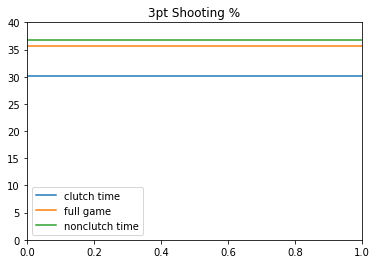

In [101]:
plt.plot(np.arange(len(clutch_stats)), clutch_stats.league_3pt_avg, label = 'clutch time')

plt.plot(np.arange(len(reg_stats)), reg_stats.league_3pt_avg, label= 'full game')

plt.plot(np.arange(len(nonclutch_stats)), nonclutch_stats.league_3pt_avg, label = 'nonclutch time')
plt.title('3pt Shooting %')
plt.xlim([0, 1])
plt.ylim([0,40])
plt.legend();




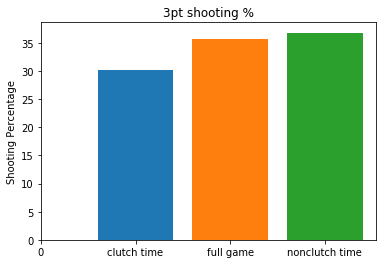

In [100]:
names = (0,'clutch time', 'full game', 'nonclutch time')

y_pos = (np.arange(len(names)))
#percentages = (y, reg_stats.league_3pt_avg, nonclutch_stats.league_3pt_avg)

plt.bar(1, clutch_stats.league_3pt_avg)
plt.bar(2, reg_stats.league_3pt_avg)
plt.bar(3, nonclutch_stats.league_3pt_avg)
plt.ylabel('Shooting Percentage')
plt.xticks(y_pos, names)
plt.title('3pt shooting %')
plt.show();



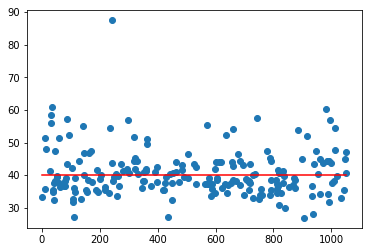

In [217]:

#colors = np.where(clutch_stats.id>0, 'b', np.where(clutch_stats['shooting%']>40.1, 'p'))
plt.scatter(clutch_stats.id, clutch_stats['shooting%'])
plt.plot(clutch_stats.league_all_shot_avg, 'r')

In [175]:
clutch_stats.head()

,player,id,total_games,shots_made,shots_missed,3pt,3pt_shots,Dunk/Layup,Dunk/Layup_attempts,2pt_med/hard,med/hard_attempts,2fg_attempts,FT_made,FT_missed,assist_count,off_rebound,total_rebound,total_blocks,2pt_fg_made,total_shots,shooting%,FT%,APG,BPG,ORPG,RPG,easy_shot%,2pt%,3pt%,med/hard_fg%,league_all_shot_avg,league_2pt_avg,league_3pt_avg,league_hard2pt_avg,league_easy2pt_avg,clutch_all_shots,clutch_2pt,clutch_3pt,clutch_hard2,clutch_easy2
1,Aaron Brooks,1.0,109,58,116,17,71,22,58,19,45,103,91,20,32,8,37,2,41,174,33.3,82.0,0.3,0.0,0.1,0.3,37.9,39.8,23.9,42.2,40.1,44.8,30.2,35.4,59.5,False,False,False,True,False
11,Al Harrington,11.0,143,73,131,12,70,37,67,24,67,134,71,32,28,36,111,1,61,204,35.8,68.9,0.2,0.0,0.3,0.8,55.2,45.5,17.1,35.8,40.1,44.8,30.2,35.4,59.5,False,True,False,True,False
12,Al Horford,12.0,175,96,91,6,21,37,57,53,109,166,88,33,28,51,202,32,90,187,51.3,72.7,0.2,0.2,0.3,1.2,64.9,54.2,28.6,48.6,40.1,44.8,30.2,35.4,59.5,True,True,False,True,True
13,Al Jefferson,13.0,202,178,192,3,9,63,82,112,279,361,79,38,24,80,245,39,175,370,48.1,67.5,0.1,0.2,0.4,1.2,76.8,48.5,33.3,40.1,40.1,44.8,30.2,35.4,59.5,True,True,False,True,True
29,Allen Iverson,29.0,135,92,131,15,50,38,62,39,111,173,120,25,71,6,44,2,77,223,41.3,82.8,0.5,0.0,0.0,0.3,61.3,44.5,30.0,35.1,40.1,44.8,30.2,35.4,59.5,True,False,False,False,True


#Did a train test split and a gradient classifier

In [127]:
x = clutch_stats.drop(['player','clutch_all_shots', 'clutch_2pt', 'clutch_3pt',	'clutch_hard2',	'clutch_easy2'], axis = 1)
y = clutch_stats['clutch_all_shots'].values

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [145]:
model= GradientBoostingClassifier()
fit = model.fit(x_train, y_train)
pred= fit.predict(x_test)


In [146]:
recall_score(y_test, pred)

1.0

In [147]:
model.score(x_test, y_test)

0.9838709677419355

In [148]:
accuracy_score(y_test, pred)

0.9838709677419355

In [149]:
f1_score(y_test, pred)

0.9787234042553191